Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pickle
import shap

In [2]:
df = pd.read_csv("TravelInsurancePrediction.csv")

In [3]:
df

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [4]:
df.shape

(1987, 10)

In [5]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [6]:
df.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Unnamed: 0,1.000000,-0.004917,-0.025031,-0.041506,-0.006858,0.006196
Age,-0.004917,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.025031,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,-0.041506,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,-0.006858,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.006196,0.061060,0.396763,0.079909,0.018190,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   EmploymentType       1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Checking for null values

In [8]:
df.isnull().any()

Unnamed: 0             False
Age                    False
EmploymentType         False
GraduateOrNot          False
AnnualIncome           False
FamilyMembers          False
ChronicDiseases        False
FrequentFlyer          False
EverTravelledAbroad    False
TravelInsurance        False
dtype: bool

In [9]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
EmploymentType         0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [10]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.GraduateOrNot = le.fit_transform(df.GraduateOrNot)
df.FrequentFlyer = le.fit_transform(df.FrequentFlyer)
df.EverTravelledAbroad = le.fit_transform(df.EverTravelledAbroad)

In [11]:
df

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,6,1,0,0,0
1,1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,1,1500000,4,0,1,1,1
1983,1983,28,Private Sector/Self Employed,1,1750000,5,1,0,1,0
1984,1984,28,Private Sector/Self Employed,1,1150000,6,1,0,0,0
1985,1985,34,Private Sector/Self Employed,1,1000000,6,0,1,1,1


Check outlier values on numeric features

In [12]:
df.head()

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,6,1,0,0,0
1,1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


<Axes: >

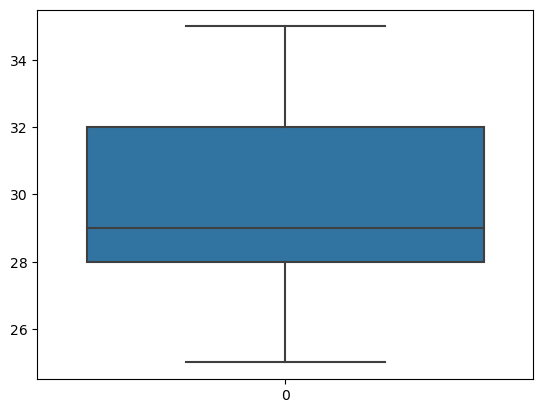

In [13]:
sns.boxplot(df["Age"])

<Axes: >

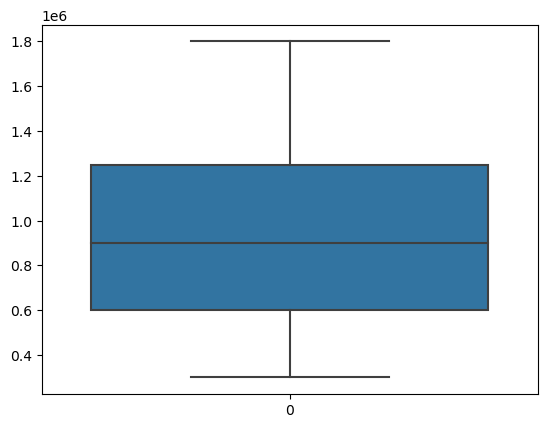

In [14]:
sns.boxplot(df["AnnualIncome"])

<Axes: >

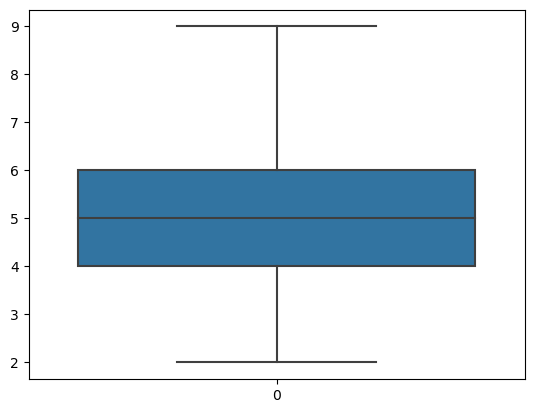

In [15]:
sns.boxplot(df["FamilyMembers"])

<Axes: >

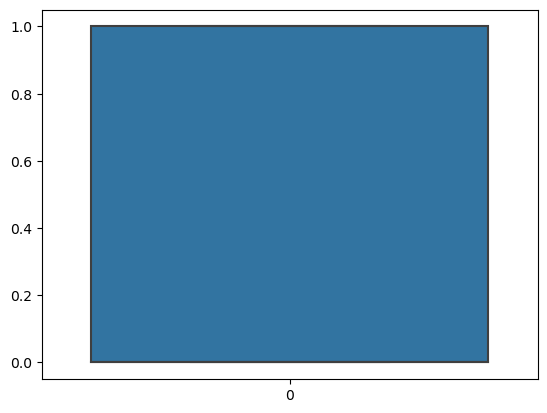

In [16]:
sns.boxplot(df["TravelInsurance"])

Based on the boxplot graph , no outlier values are obtained

In [17]:
df.describe()

,Unnamed: 0,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,573.741812,2.913308,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,0.000000,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,496.500000,28.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,993.000000,29.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,1986.000000,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


Data Visualization / Visual Analysis 

In [18]:
cats = []
nums = []
for i in df.columns:
    if df[i].dtype == 'object':
        cats.append(i)
    else:
        nums.append(i)
print('cats = ', cats)
print('nums = ',nums)

cats =  ['EmploymentType']
nums =  ['Unnamed: 0', 'Age', 'GraduateOrNot', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']


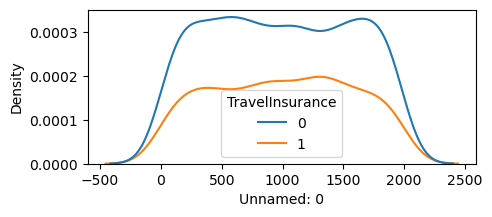

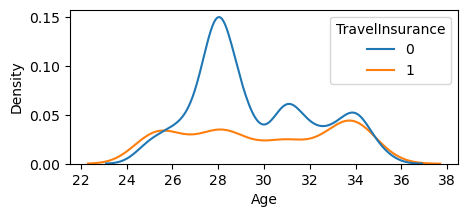

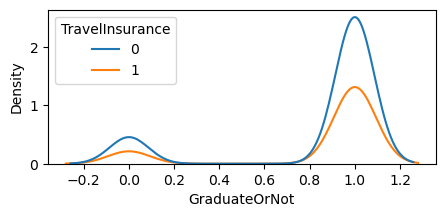

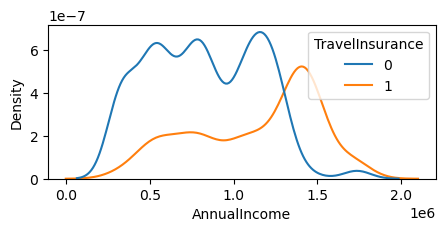

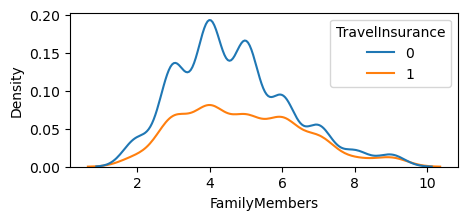

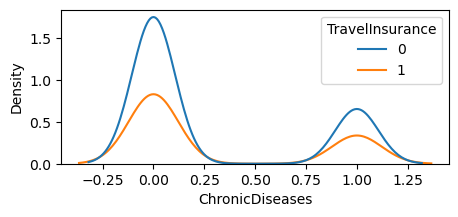

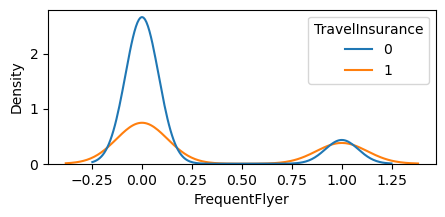

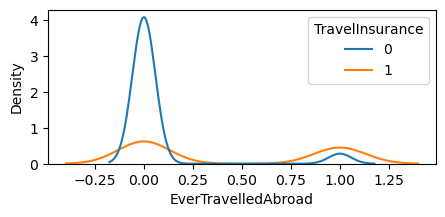

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


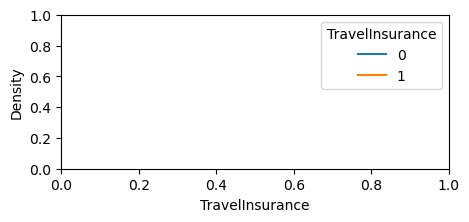

In [19]:
for feature in nums:
    fig, ax = plt.subplots(figsize = (5,2))
    sns.kdeplot(data = df , hue = 'TravelInsurance' , x = feature, ax = ax)
    plt.show()

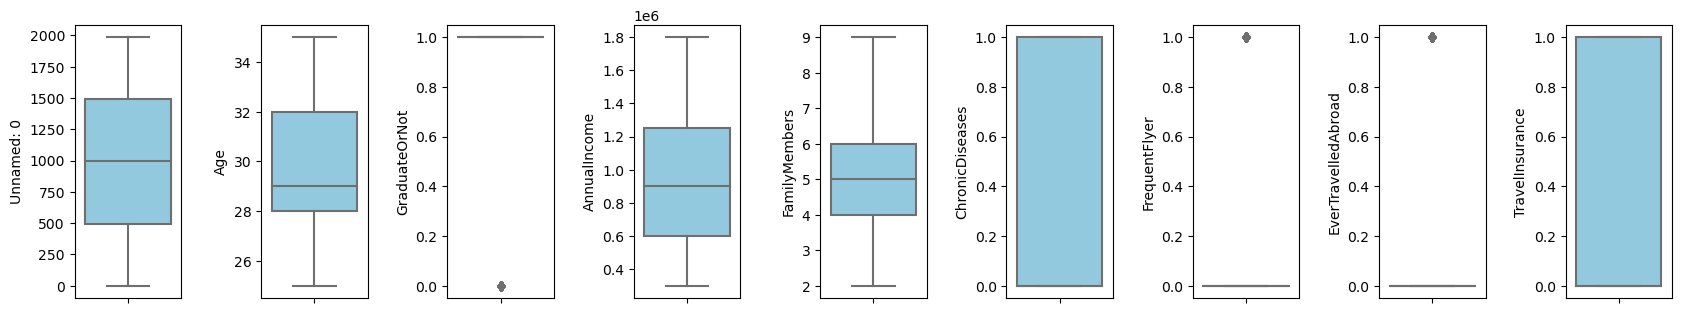

In [20]:
plt.figure(figsize = (20,12))
for i in range(0, len(nums)):
    plt.subplot(4,11,i+2)
    sns.boxplot(y = df[nums[i]] , color = 'skyblue' , orient = 'v')
plt.tight_layout()

Based on the boxplot graph, no outlier values are obtained

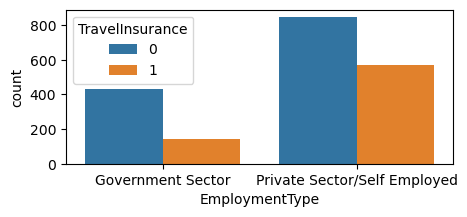

In [21]:
target = 'TravelInsurance'
for feature in cats:
    fig, ax = plt.subplots(figsize = (5,2))
    sns.countplot(x = feature , hue = target , data = df, ax = ax)
    plt.show()

In [22]:
# plt.figure(figsize = (20,5))
# plt.subplot(131)
# sns.countplot(df['TravelInsurance'] , hue = df['GraduateOrNot'])
# plt.legend(loc = 'upper right')
# plt.subplot(132)
# sns.countplot(df['TravelInsurance'] , hue = df['FrequentFlyer'])
# plt.subplot(133)
# sns.countplot(df['TravelInsurance'] , hue = df['EverTravelledAbroad'])

Visualizing the relation between TravelInsurance, FrequentFlyer, GraduateOrNot & EverTravelLedAbroad



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Age', ylabel='Density'>

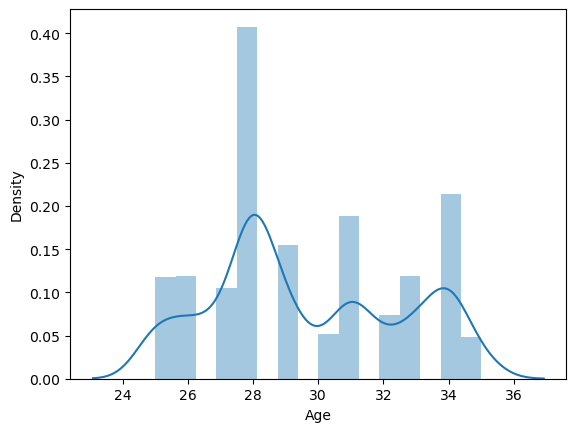

In [23]:
sns.distplot(df["Age"])

In [24]:
df.corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,Unnamed: 0,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Unnamed: 0,1.000000,-0.004917,-0.008602,-0.025031,-0.041506,-0.006858,-0.004596,-0.002160,0.006196
Age,-0.004917,1.000000,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
GraduateOrNot,-0.008602,0.027125,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.025031,-0.020101,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,-0.041506,0.027409,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,-0.006858,0.007359,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.004596,-0.033159,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.002160,-0.012779,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.006196,0.061060,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


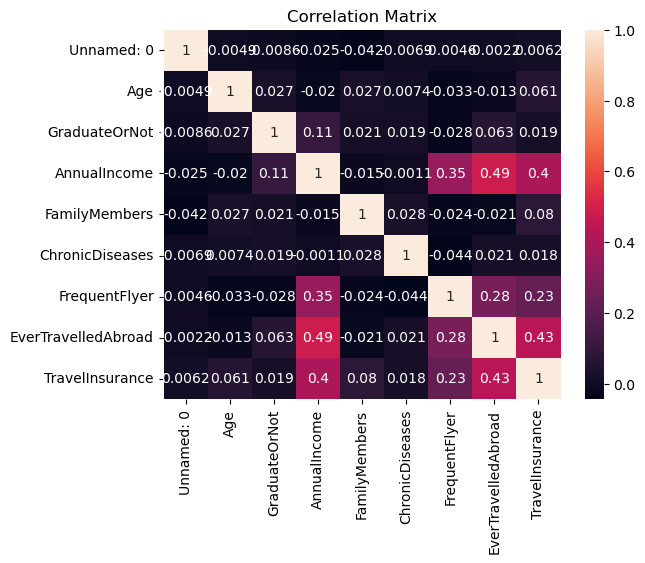

In [25]:
sns.heatmap(df.corr() , annot = True)
plt.title('Correlation Matrix')
plt.show()

In [26]:
df.head()

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,6,1,0,0,0
1,1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


Splitting Dependent and Independent Variables

In [228]:
# x = df.iloc[:,1:6]
# x.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers
0,31,Government Sector,1,400000,6
1,31,Private Sector/Self Employed,1,1250000,7
2,34,Private Sector/Self Employed,1,500000,4
3,28,Private Sector/Self Employed,1,700000,3
4,28,Private Sector/Self Employed,1,700000,8


In [229]:
# y = df.ChronicDiseases
# y.head()

0    1
1    0
2    1
3    1
4    1
Name: ChronicDiseases, dtype: int64

In [27]:
x = df.drop(['TravelInsurance'] , axis = 1)
y = df['TravelInsurance']

Label Encoding again

In [28]:
x.EmploymentType = le.fit_transform(x.EmploymentType)
x.head()

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0,31,0,1,400000,6,1,0,0
1,1,31,1,1,1250000,7,0,0,0
2,2,34,1,1,500000,4,1,0,0
3,3,28,1,1,700000,3,1,0,0
4,4,28,1,1,700000,8,1,1,0


Feature Scaling

In [241]:
# from sklearn.preprocessing import MinMaxScaler
# ms = MinMaxScaler()
# x_scaled = pd.DataFrame(ms.fit_transform(x) , columns = x.columns)
# x_scaled

Splitting Data into Train and Test

In [29]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 42)

In [30]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1390, 9), (597, 9), (1390,), (597,))

In [31]:
x_train.head()

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
1953,1953,34,0,1,1300000,7,0,0,0
1642,1642,31,1,1,1250000,7,0,0,0
943,943,29,1,1,1200000,5,1,0,0
286,286,28,1,1,600000,3,0,0,0
1593,1593,26,1,1,500000,8,0,0,0


In [47]:
# explainer = shap.TreeExplainer(x_test)
# shap_values = explainer.shap_values(x_test)
# shap.summary_plot(shap_values[1] , x_test) #Summary shap value terhadap label positive

Logistic Regression 

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
model.fit(x_train , y_train)

LogisticRegression()

In [35]:
pred = model.predict(x_test)

In [36]:
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [37]:
y_test

212     0
1517    1
785     0
1175    0
1760    1
       ..
1481    1
575     1
557     0
1726    1
1586    1
Name: TravelInsurance, Length: 597, dtype: int64

In [38]:
df

,Unnamed: 0,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,6,1,0,0,0
1,1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,1,1500000,4,0,1,1,1
1983,1983,28,Private Sector/Self Employed,1,1750000,5,1,0,1,0
1984,1984,28,Private Sector/Self Employed,1,1150000,6,1,0,0,0
1985,1985,34,Private Sector/Self Employed,1,1000000,6,0,1,1,1


Decision Tree Classifier

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(dtc):
    # Predict labels for the test data if not already done
    y_pred = dtc.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred)

    # Display evaluation results
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("ROC AUC:", roc_auc)


In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)
y_pred = dtc.predict(x_test)
eval_classification(dtc)

Accuracy: 0.7085427135678392
Precision: 0.6871232541043861
Recall: 0.6834594594594594
F1-score: 0.6850654862963861
ROC AUC: 0.6834594594594595


Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)
y_pred = rfc.predict(x_test)
eval_classification(rfc)

Accuracy: 0.8123953098827471
Precision: 0.8195305018870049
Recall: 0.7725585585585586
F1-score: 0.7856153490996767
ROC AUC: 0.7725585585585586


KNNClassifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train , y_train)
y_pred = knc.predict(x_test)
eval_classification(knc)

Accuracy: 0.7487437185929648
Precision: 0.748010509370349
Recall: 0.6961621621621621
F1-score: 0.7053966206969154
ROC AUC: 0.6961621621621622


Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train , y_train)
y_pred = gbc.predict(x_test)
eval_classification(gbc)

Accuracy: 0.8274706867671692
Precision: 0.8625003926989413
Recall: 0.7772072072072072
F1-score: 0.7955159903296498
ROC AUC: 0.7772072072072073


Naive Bayes model

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)
y_pred = gnb.predict(x_test)
eval_classification(gnb)

Accuracy: 0.7621440536013401
Precision: 0.7703188496405127
Recall: 0.7077477477477477
F1-score: 0.7185308648533787
ROC AUC: 0.7077477477477478


In [45]:
print(rfc.predict([[40,1,0,200000,5,1,0,1,1]]))

[0]


X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [46]:
#dump selected model 
pickle.dump(gbc,open('Travel.pkl','wb'))